In [15]:
# ==============================================================================
# Cell 1: Imports and Configuration
# ==============================================================================
import requests
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
EIA_API_KEY = "RUvceqI8RjaCuc63uGDF2cHzs4eJd3Iq63Y3CMUo" # This is your key

In [16]:
# ==============================================================================
# Cell 2: Fetch and Process WIND Data
# ==============================================================================
print("--- Fetching WIND Data ---")
WIND_FUELTYPEID = "WND"

url_wind = (
    f"https://api.eia.gov/v2/electricity/electric-power-operational-data/data?"
    f"api_key={EIA_API_KEY}"
    f"&frequency=annual"
    f"&data[0]=generation"
    f"&facets[location][]=OK"
    f"&facets[sectorid][]=99"
    f"&facets[fueltypeid][]={WIND_FUELTYPEID}"
    f"&sort[0][column]=period"
    f"&sort[0][direction]=asc"
    f"&offset=0"
    f"&length=5000"
)

print(f"Requesting WIND data from URL: {url_wind}")
df_wind_final = pd.DataFrame() # Initialize an empty DataFrame for wind

try:
    response_wind = requests.get(url_wind)
    print(f"WIND Response Status Code: {response_wind.status_code}")
    response_wind.raise_for_status()
    print("Successfully fetched WIND data from EIA API!")
    
    data_wind = response_wind.json()
    
    if 'response' in data_wind and 'data' in data_wind['response'] and len(data_wind['response']['data']) > 0:
        eia_data_wind = data_wind['response']['data']
        df_wind_temp = pd.DataFrame(eia_data_wind)
        
        print("\n--- Columns in received WIND data ---")
        print(df_wind_temp.columns) 
        print("\n--- Sample of received WIND data (first 5 rows) ---")
        print(df_wind_temp.head().to_string())
        
        if 'period' in df_wind_temp.columns and 'generation' in df_wind_temp.columns:
            df_wind_final = df_wind_temp[['period', 'generation']].copy() # Assign to df_wind_final
            df_wind_final.rename(columns={'period': 'Year', 'generation': 'Net_Generation_MWh'}, inplace=True)
            df_wind_final['Year'] = pd.to_numeric(df_wind_final['Year'])
            df_wind_final['Net_Generation_MWh'] = pd.to_numeric(df_wind_final['Net_Generation_MWh'], errors='coerce')
            df_wind_final.dropna(subset=['Net_Generation_MWh'], inplace=True)
            df_wind_final.sort_values('Year', inplace=True, ascending=True) 
            
            print("\n--- Processed WIND DataFrame (df_wind_final) ---")
            print(df_wind_final.head())
            if not df_wind_final.empty:
                print(f"\nWIND Data from {df_wind_final['Year'].min()} to {df_wind_final['Year'].max()}")
        else:
            print("Required columns ('period' or 'generation') not found in the WIND DataFrame.")
    else:
        print("No WIND data found in the API response (data array might be empty).")
        if 'response' in data_wind and 'data' in data_wind['response']:
             print(f"Total records reported by API for WIND: {data_wind.get('response', {}).get('total', 'N/A')}")

except Exception as e:
    print(f"An error occurred while fetching WIND data: {e}")

--- Fetching WIND Data ---
Requesting WIND data from URL: https://api.eia.gov/v2/electricity/electric-power-operational-data/data?api_key=RUvceqI8RjaCuc63uGDF2cHzs4eJd3Iq63Y3CMUo&frequency=annual&data[0]=generation&facets[location][]=OK&facets[sectorid][]=99&facets[fueltypeid][]=WND&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000
WIND Response Status Code: 200
Successfully fetched WIND data from EIA API!

--- Columns in received WIND data ---
Index(['period', 'location', 'stateDescription', 'sectorid',
       'sectorDescription', 'fueltypeid', 'fuelTypeDescription', 'generation',
       'generation-units'],
      dtype='object')

--- Sample of received WIND data (first 5 rows) ---
  period location stateDescription sectorid sectorDescription fueltypeid fuelTypeDescription generation        generation-units
0   2003       OK         Oklahoma       99       All Sectors        WND                wind      54.47  thousand megawatthours
1   2004       OK         Oklahoma 

In [17]:
# ==============================================================================
# Cell 3: Fetch and Process SOLAR Data
# ==============================================================================
print("\n\n--- Fetching SOLAR Data ---")
SOLAR_FUELTYPEID = "SUN" 

url_solar = (
    f"https://api.eia.gov/v2/electricity/electric-power-operational-data/data?"
    f"api_key={EIA_API_KEY}"
    f"&frequency=annual"
    f"&data[0]=generation"
    f"&facets[location][]=OK"
    f"&facets[sectorid][]=99"
    f"&facets[fueltypeid][]={SOLAR_FUELTYPEID}"
    f"&sort[0][column]=period"
    f"&sort[0][direction]=asc"
    f"&offset=0"
    f"&length=5000"
)

print(f"Requesting SOLAR data from URL: {url_solar}")
df_solar_final = pd.DataFrame() # Initialize an empty DataFrame for solar

try:
    response_solar = requests.get(url_solar)
    print(f"SOLAR Response Status Code: {response_solar.status_code}")
    response_solar.raise_for_status()
    print("Successfully fetched SOLAR data from EIA API!")
    
    data_solar = response_solar.json()
    
    if 'response' in data_solar and 'data' in data_solar['response'] and len(data_solar['response']['data']) > 0:
        eia_data_solar = data_solar['response']['data']
        df_solar_temp = pd.DataFrame(eia_data_solar)
        
        print("\n--- Columns in received SOLAR data ---")
        print(df_solar_temp.columns) 
        print("\n--- Sample of received SOLAR data (first 5 rows) ---")
        print(df_solar_temp.head().to_string())
        
        if 'period' in df_solar_temp.columns and 'generation' in df_solar_temp.columns:
            df_solar_final = df_solar_temp[['period', 'generation']].copy() # Assign to df_solar_final
            df_solar_final.rename(columns={'period': 'Year', 'generation': 'Net_Generation_MWh'}, inplace=True)
            df_solar_final['Year'] = pd.to_numeric(df_solar_final['Year'])
            df_solar_final['Net_Generation_MWh'] = pd.to_numeric(df_solar_final['Net_Generation_MWh'], errors='coerce')
            df_solar_final.dropna(subset=['Net_Generation_MWh'], inplace=True)
            df_solar_final.sort_values('Year', inplace=True, ascending=True) 
            
            print("\n--- Processed SOLAR DataFrame (df_solar_final) ---")
            print(df_solar_final.head())
            if not df_solar_final.empty:
                print(f"\nSOLAR Data from {df_solar_final['Year'].min()} to {df_solar_final['Year'].max()}")
        else:
            print("Required columns ('period' or 'generation') not found in the SOLAR DataFrame.")
    else:
        print("No SOLAR data found in the API response (data array might be empty).")
        if 'response' in data_solar and 'data' in data_solar['response']:
            print(f"Total records reported by API for SOLAR: {data_solar.get('response', {}).get('total', 'N/A')}")

except Exception as e:
    print(f"An error occurred while fetching SOLAR data: {e}")




--- Fetching SOLAR Data ---
Requesting SOLAR data from URL: https://api.eia.gov/v2/electricity/electric-power-operational-data/data?api_key=RUvceqI8RjaCuc63uGDF2cHzs4eJd3Iq63Y3CMUo&frequency=annual&data[0]=generation&facets[location][]=OK&facets[sectorid][]=99&facets[fueltypeid][]=SUN&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000
SOLAR Response Status Code: 200
Successfully fetched SOLAR data from EIA API!

--- Columns in received SOLAR data ---
Index(['period', 'location', 'stateDescription', 'sectorid',
       'sectorDescription', 'fueltypeid', 'fuelTypeDescription', 'generation',
       'generation-units'],
      dtype='object')

--- Sample of received SOLAR data (first 5 rows) ---
  period location stateDescription sectorid sectorDescription fueltypeid fuelTypeDescription generation        generation-units
0   2015       OK         Oklahoma       99       All Sectors        SUN               solar      1.556  thousand megawatthours
1   2016       OK         O



--- Generating Combined Plot ---


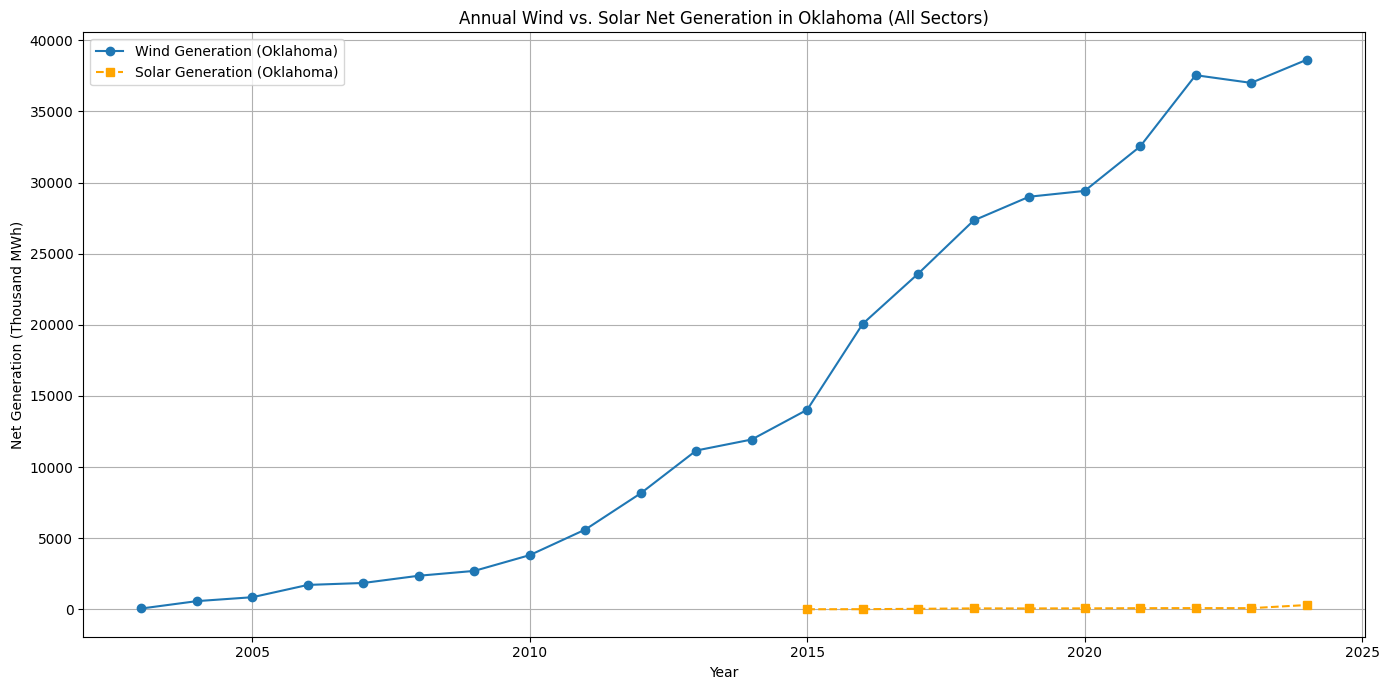

In [18]:
# ==============================================================================
# Cell 4: Combined Plotting
# ==============================================================================
print("\n\n--- Generating Combined Plot ---")
plt.figure(figsize=(14, 7))

plot_successful = False # Flag to check if at least one series was plotted

if not df_wind_final.empty:
    plt.plot(df_wind_final['Year'], df_wind_final['Net_Generation_MWh'], marker='o', linestyle='-', label='Wind Generation (Oklahoma)')
    plot_successful = True
else:
    print("No WIND data to plot.")

if not df_solar_final.empty:
    plt.plot(df_solar_final['Year'], df_solar_final['Net_Generation_MWh'], marker='s', linestyle='--', label='Solar Generation (Oklahoma)', color='orange')
    plot_successful = True
else:
    print("No SOLAR data to plot.")

if plot_successful:
    plt.title('Annual Wind vs. Solar Net Generation in Oklahoma (All Sectors)')
    plt.xlabel('Year')
    plt.ylabel('Net Generation (Thousand MWh)') # Assuming units are consistently thousand MWh from data
    plt.legend() 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Neither Wind nor Solar data was available for plotting.")